In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

direction='in'
import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib import rc
mpl.rcParams.update({
    'font.family' : 'Arial', #STIXGeneral
    'mathtext.fontset' : 'cm', #stix
    'xtick.direction' : direction ,
    'ytick.direction' : direction ,
    'xtick.labelsize' : 17.5 ,
    'xtick.top' : True ,
    'xtick.major.width' : 1.5,
    'xtick.major.size' : 6,
    'ytick.labelsize' : 17.5 ,
    'ytick.right' : True ,
    'ytick.major.width' : 1.5,
    'ytick.major.size' : 6,
    'axes.labelsize' : 18,
    'legend.frameon' : False,
    'legend.fontsize' : 13,
    'legend.handlelength' : 2,
    'savefig.dpi' : 600, 
    'savefig.bbox' : 'tight',
    'axes.linewidth' : 1.5,
})
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import seaborn as sns

print(plt.rcParams['font.family'])

/Users/hyejin/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['Arial']


In [2]:
import argparse
def is_non_zero_file(fpath, verb=False):
    if verb: 
        if os.path.isfile(fpath)==False: print('No', fpath)
    return os.path.isfile(fpath) and os.path.getsize(fpath) > 0

In [5]:
def _rect_inter_inner(x1,x2):
    n1=x1.shape[0]-1
    n2=x2.shape[0]-1
    X1=np.c_[x1[:-1],x1[1:]]
    X2=np.c_[x2[:-1],x2[1:]]    
    S1=np.tile(X1.min(axis=1),(n2,1)).T
    S2=np.tile(X2.max(axis=1),(n1,1))
    S3=np.tile(X1.max(axis=1),(n2,1)).T
    S4=np.tile(X2.min(axis=1),(n1,1))
    return S1,S2,S3,S4

def _rectangle_intersection_(x1,y1,x2,y2):
    S1,S2,S3,S4=_rect_inter_inner(x1,x2)
    S5,S6,S7,S8=_rect_inter_inner(y1,y2)

    C1=np.less_equal(S1,S2)
    C2=np.greater_equal(S3,S4)
    C3=np.less_equal(S5,S6)
    C4=np.greater_equal(S7,S8)

    ii,jj=np.nonzero(C1 & C2 & C3 & C4)
    return ii,jj

def intersection(x1,y1,x2,y2):
    """
INTERSECTIONS Intersections of curves.
   Computes the (x,y) locations where two curves intersect.  The curves
   can be broken with NaNs or have vertical segments.
usage:
x,y=intersection(x1,y1,x2,y2)
    Example:
    a, b = 1, 2
    phi = np.linspace(3, 10, 100)
    x1 = a*phi - b*np.sin(phi)
    y1 = a - b*np.cos(phi)
    x2=phi    
    y2=np.sin(phi)+2
    x,y=intersection(x1,y1,x2,y2)
    plt.plot(x1,y1,c='r')
    plt.plot(x2,y2,c='g')
    plt.plot(x,y,'*k')
    plt.show()
    """
    ii,jj=_rectangle_intersection_(x1,y1,x2,y2)
    n=len(ii)

    dxy1=np.diff(np.c_[x1,y1],axis=0)
    dxy2=np.diff(np.c_[x2,y2],axis=0)

    T=np.zeros((4,n))
    AA=np.zeros((4,4,n))
    AA[0:2,2,:]=-1
    AA[2:4,3,:]=-1
    AA[0::2,0,:]=dxy1[ii,:].T
    AA[1::2,1,:]=dxy2[jj,:].T

    BB=np.zeros((4,n))
    BB[0,:]=-x1[ii].ravel()
    BB[1,:]=-x2[jj].ravel()
    BB[2,:]=-y1[ii].ravel()
    BB[3,:]=-y2[jj].ravel()

    for i in range(n):
        try:
            T[:,i]=np.linalg.solve(AA[:,:,i],BB[:,i])
        except:
            T[:,i]=np.NaN


    in_range= (T[0,:] >=0) & (T[1,:] >=0) & (T[0,:] <=1) & (T[1,:] <=1)

    xy0=T[2:,in_range]
    xy0=xy0.T
    return xy0[:,0],xy0[:,1]
def intersection_slope(x, x1, y1):
    argx = np.argmin(np.abs(np.array(x1)-x))
    mid = (x1[argx+1]-x1[argx])/(y1[argx+1]-y1[argx])+(x1[argx]-x1[argx-1])/(y1[argx]-y1[argx-1])
    return argx, mid/2

In [76]:
modeldict = {'p11':r'QuAN$_2$', 'p01':'PAB', 'p00':'SMLP'}
color_r = ['#20DF90', '#33BF9D', '#459FAA', '#5880B8', '#6B60C5', '#7D40D2', '#9020DF']

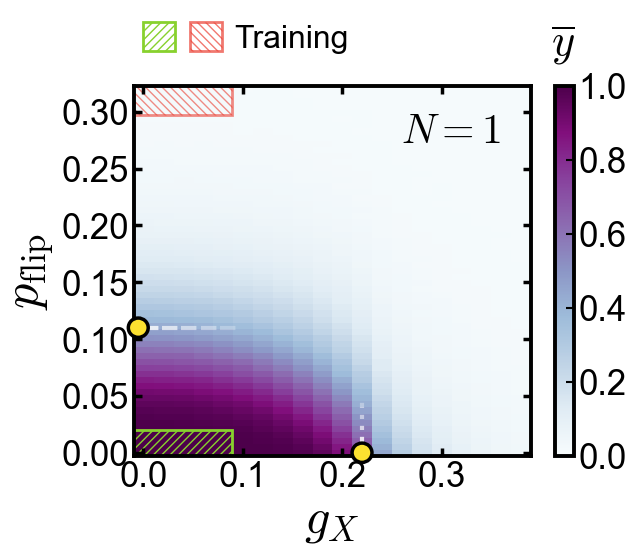

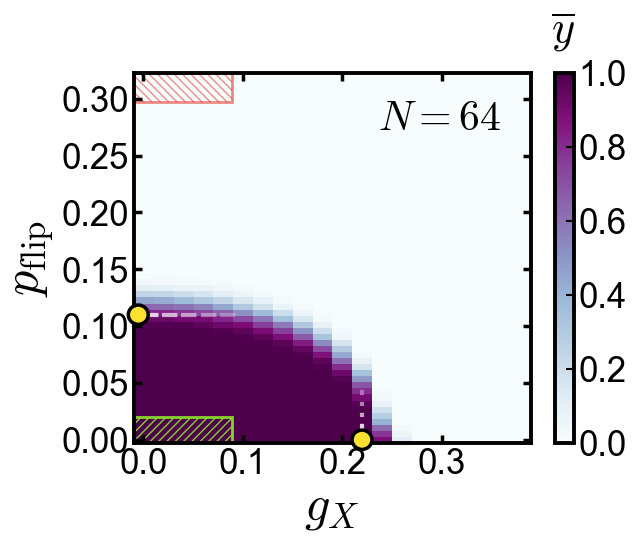

In [633]:
dataformat='loop'
nr, nc = 6, 6
cmaps='BuPu'
mpl.rcParams['axes.linewidth'] = 2.8

for mn in ['p11']:
    phase_diagram_out = np.zeros((9,10,20,65))
    data = np.load(f'g2_saved_models_nishad/TI_QSLloop{nr*nc}_{mn}_0.000vs{0.3:.3f}_5_phasediagram.npz')
    phase_diagram_out[:,:,:,:61] = data['arr0']
    

    for k, setsize in enumerate(2**np.arange(8)):
        if setsize!=64 and setsize!=1: continue
        im = plt.imshow(phase_diagram_out[k, :6, :, :61][phase_diagram_out[k, :6, 0, 0]>0].mean(axis=0).T, \
                        origin='lower', cmap=cmaps,**{'vmax':1.0, 'vmin':0.0}, \
                        extent=[-0.38/20/2,0.38+0.38/20/2,-0.32/64/2,0.32+0.32/60/2], aspect='auto')
        cbar = plt.colorbar(im); cbar.ax.tick_params(labelsize=25)
        plt.yticks([0.0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30], fontsize=25)
        plt.xticks(fontsize=25)
        plt.ylabel(r'$p_\mathrm{flip}$', fontsize=36)
            
            
        plt.text(0.41,0.35,r'$\overline{y}$', fontsize=32)
        plt.xlabel(r'$g_X$', fontsize=36)
        plt.text(0.36,0.273,fr'$N={setsize}$', fontsize=30, ha='right')
                
        rect0 = mpatches.Rectangle((-1,-1),1.089,1.02, lw=2,ec='#88d12e',\
                                   ls='-',fc='none', hatch='////', alpha=1)
        rect1 = mpatches.Rectangle((-1,0.2975),1.089,1.02, lw=2,ec='#eb4034',\
                                   ls='-',fc='none', hatch='\\\\\\\\', alpha=0.6)
        plt.gca().add_patch(rect0); plt.gca().add_patch(rect1)
        
        
        num = 6
        xvan = np.linspace(-0.00,0.08*6/5,num)
        yvan = np.ones(num)*0.11
        for i in range(num):
            plt.plot(xvan[i:i+2], yvan[i:i+2], '--', c='#ffffff', lw=3, alpha=0.8*(1-i/num))
        num = 6
        xvan = np.ones(num)*0.22
        yvan = np.linspace(-0.00,0.05,num)
        for i in range(num):
            plt.plot(xvan[i:i+2], yvan[i:i+2], ':', c='#ffffff', lw=3, alpha=1-i/num)

        circ0 = mpatches.Ellipse((-0.2/40,0.11),0.02*1,0.02*0.85, ec='k', fc='#fce130', lw=2.5, \
                                clip_on = False, zorder=10)
        circ1 = mpatches.Ellipse((0.22, 0),0.02*1,0.02*0.85, ec='k', fc='#fce130', lw=2.5, \
                                clip_on = False, zorder=10)
        plt.gca().add_patch(circ0); plt.gca().add_patch(circ1); 
        
        plt.xlim(-0.38/20/2,0.38+0.38/20/2)
        plt.ylim(-0.32/64/2,0.32+0.32/60/2)
        if k==0:
            rect2 = mpatches.Rectangle((-1,-1),1,1, lw=2,ec='#88d12e',\
                                       ls='-',fc='none', hatch='////', alpha=1, label=' ')
            rect3 = mpatches.Rectangle((-1,0.28),1,1, lw=2,ec='#eb4034',\
                                       ls='-',fc='none', hatch='\\\\\\\\', alpha=0.7, label='Training')
            plt.legend(handles=[rect2, rect3], ncol=2, loc='upper left',\
                        fontsize=23, handlelength=1, handleheight=1, handletextpad=0.4, \
                        columnspacing=-0.2, bbox_to_anchor=(-0.05,1.25))
        
        
        plt.gca().xaxis.set_tick_params(width=2.5)
        plt.gca().yaxis.set_tick_params(width=2.5)
        plt.savefig(f'fig4c_{k}.png', dpi = 300)
        plt.show()

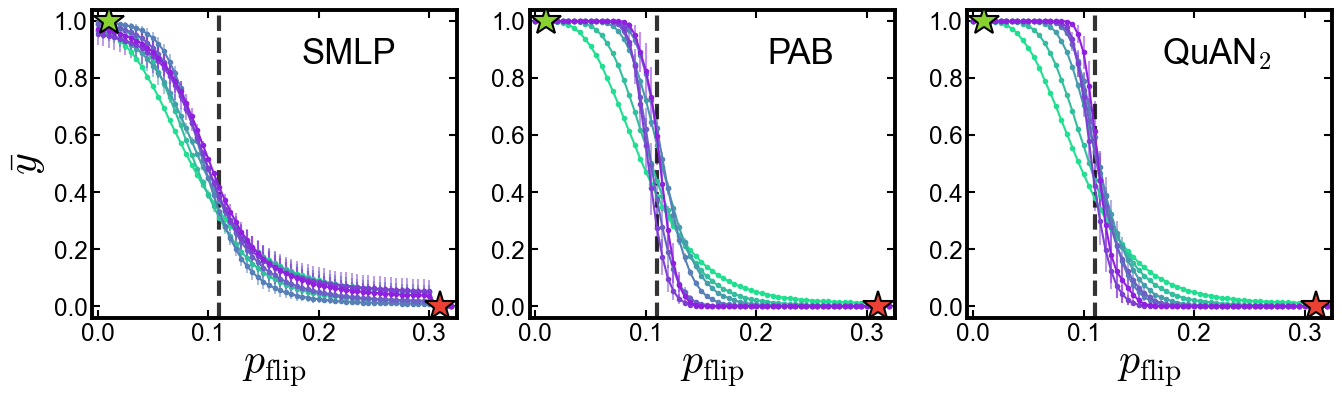

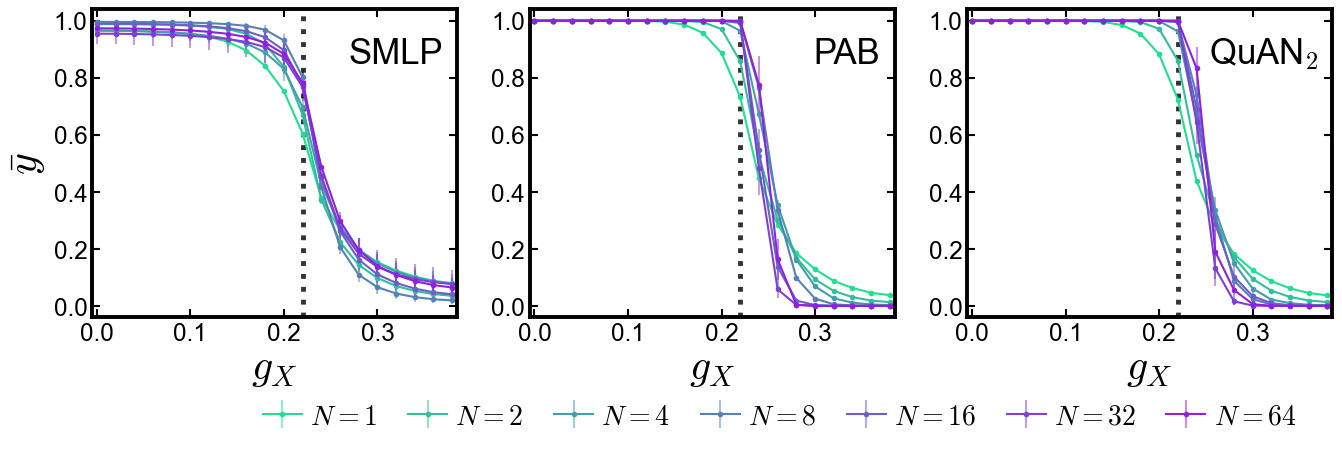

In [628]:
nr = 6; nc = nr
color_r = ['#20DF90', '#33BF9D', '#459FAA', '#5880B8', '#6B60C5', '#7D40D2', '#9020DF']

for p2train in [0.3]:
        
    fig, ax = plt.subplots(1, 3, figsize=(16, 4))
    for i,mn in enumerate(['p00', 'p01', 'p11']):
        filename = f'g2_saved_models_nishad/TI_QSLloop{nr*nc}_{mn}_0.000vs{p2train:.3f}_5_phasediagram.npz'
        if mn=='p00':
            filename = f'g2_saved_models_nishad_new/TI_QSLloop{nr*nc}_{mn}_0.000vs{p2train:.3f}_5_phasediagram.npz'
        data = np.load(filename)
        phase_diagram_out = np.zeros((9,10,20,65))
        phase_diagram_out[:,:,:,:61] = data['arr0']
        decision_boundary = np.zeros((9,10)); decision_boundary[:] = np.nan
        
        ax[i].plot(0.01, 1, '*', mew=1.5, mec='k', mfc='#88d12e', ms=22, label=' ', zorder=10)
        ax[i].plot(0.31, 0, '*', mew=1.5, mec='k', mfc='#eb4034', ms=22, label='Training', zorder=10)

        errorbar = True
        for k, setsize in enumerate(2**np.arange(7)):
            n = 0
            mask = (phase_diagram_out[k, :, n, 0]>0) 
            if mn!='p00':
                mask *= (phase_diagram_out[k, :, n, 40]<0.05)
            if not errorbar:
                ax[i].plot(0.005*np.arange(65), \
                     phase_diagram_out[k, :, n][mask].mean(axis=0), '.-', \
                     c=color_r[k], label=fr'$N={setsize}$')
            else:
                markers, caps, bars = ax[i].errorbar(0.005*np.arange(65), \
                     phase_diagram_out[k, :, n][mask].mean(axis=0), \
                     yerr = phase_diagram_out[k, :, n][mask].std(axis=0)/np.sqrt(mask.sum()),\
                     fmt='.-', c=color_r[k], label=fr'$N={setsize}$')
                [bar.set_alpha(0.5) for bar in bars]; [cap.set_alpha(0.5) for cap in caps]
        ax[0].set_ylabel(r'$\bar{y}$', fontsize=30)
        ax[i].set_xlabel(r'$p_\mathrm{flip}$', fontsize=30)
        ax[i].set_xlim(-0.005,0.325)
        ax[i].set_ylim(-0.04,1.04)
        ax[i].axvline(0.11, c='k', alpha=.8, lw=3, ls='--')
        ax[i].text(0.27, 0.85, f'{modeldict[mn]}', fontsize=25, ha='right')
        circ0 = mpatches.Ellipse((0.11, 0),0.02*0.7,0.02*2.5, ec='k', fc='#fce130', lw=2.5, \
                                clip_on = False, zorder=10)
   
    plt.savefig('fig_sup_E_cut1.png', dpi = 300)
    plt.show()
    
    fig, ax = plt.subplots(1, 3, figsize=(16, 4))
    for i,mn in enumerate(['p00', 'p01', 'p11']):
        filename = f'g2_saved_models_nishad/TI_QSLloop{nr*nc}_{mn}_0.000vs{p2train:.3f}_5_phasediagram.npz'
        if mn=='p00':
            filename = f'g2_saved_models_nishad_new/TI_QSLloop{nr*nc}_{mn}_0.000vs{p2train:.3f}_5_phasediagram.npz'
        data = np.load(filename)
        phase_diagram_out = data['arr0']
        decision_boundary = np.zeros((9,10)); decision_boundary[:] = np.nan

        if mn=='p00': errorbar = True
        else: errorbar = True
        for k, setsize in enumerate(2**np.arange(7)):
            n = 0
            mask = (phase_diagram_out[k, :, n, 0]>0) 
            if mn!='p00':
                mask *= (phase_diagram_out[k, :, n, 40]<0.05)
            if not errorbar:
                ax[i].plot(0.02*np.arange(20), \
                     phase_diagram_out[k, :, :20, n][mask].mean(axis=0), '.-', \
                     c=color_r[k], label=fr'$N={setsize}$')
            else:
                markers, caps, bars = ax[i].errorbar(0.02*np.arange(20), \
                     phase_diagram_out[k, :, :20, n][mask].mean(axis=0), \
                     yerr = phase_diagram_out[k, :, :20, n][mask].std(axis=0)/np.sqrt(mask.sum()),\
                     fmt='.-', c=color_r[k], label=fr'$N={setsize}$')
                [bar.set_alpha(0.5) for bar in bars]; [cap.set_alpha(0.5) for cap in caps]
        ax[0].set_ylabel(r'$\bar{y}$', fontsize=30)
        ax[i].set_xlabel(r'$g_X$', fontsize=30)
        ax[i].set_xlim(-0.005,0.38+0.005)
        ax[i].set_ylim(-0.04,1.04)
        ax[i].axvline(0.22, c='k', lw=3.5, alpha=.8, ls=':');
        ax[i].text(0.37, 0.85, f'{modeldict[mn]}', fontsize=25, ha='right')
        circ1 = mpatches.Ellipse((0.22, 0),0.024*0.7,0.024*2.3, ec='k', fc='#fce130', lw=2.5, \
                                clip_on = False, zorder=10)
#         ax[i].add_patch(circ1); 
    ax[i].legend(ncol=7, loc='upper left',\
                        fontsize=20, handletextpad=0.3, handlelength =1.4, columnspacing=1.1, \
                        bbox_to_anchor=(-2,-0.2))    
    plt.savefig('fig_sup_E_cut2.png', dpi = 300)
    plt.show()

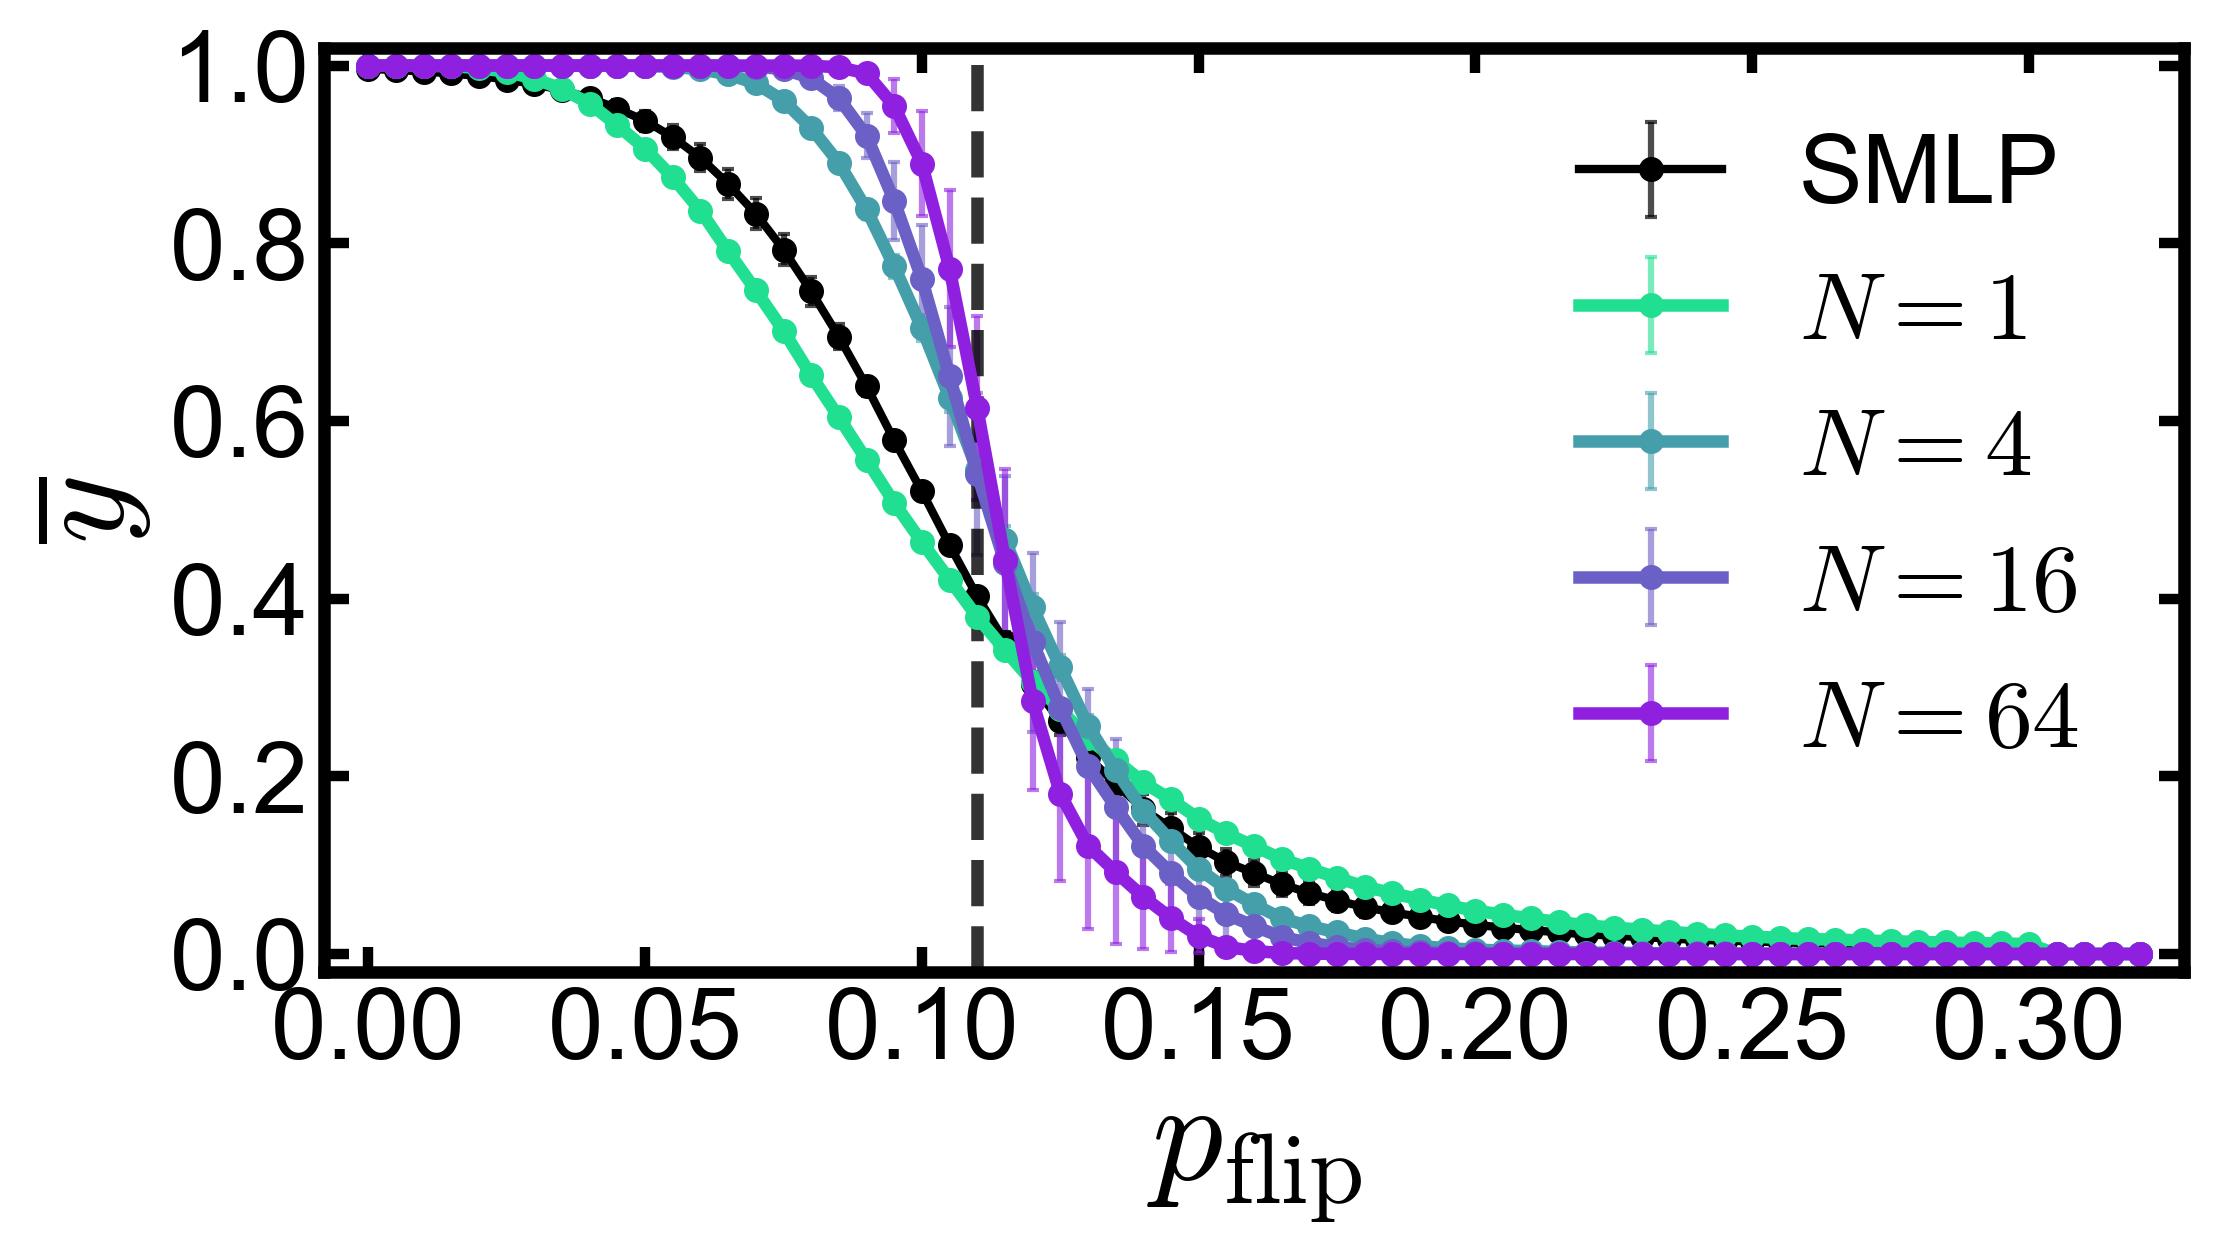

In [122]:
plt.figure(figsize=(8, 4), dpi=300)
mpl.rcParams['axes.linewidth'] = 3

nr = 6; nc = nr
for p2train in [0.3]:
    filename = f'g2_saved_models_nishad_new/TI_QSLloop{nr*nc}_p00_0.000vs{p2train:.3f}_5_phasediagram.npz'
    data = np.load(filename)
    phase_diagram_out = np.zeros((9,10,20,65))
    phase_diagram_out[:,:,:,:61] = data['arr0']
    decision_boundary = np.zeros((9,10)); decision_boundary[:] = np.nan
    mask = (phase_diagram_out[6, :, n, 0]>0); mask *= (phase_diagram_out[6, :, n, 40]<0.05)
    markers, caps, bars = plt.errorbar(0.005*np.arange(65), \
                 phase_diagram_out[6, :, n, :65][mask].mean(axis=0), \
                 yerr = phase_diagram_out[6, :, n, :65][mask].std(axis=0)/np.sqrt(mask.sum()),\
                 fmt='.-', lw=2, capsize=1.5, elinewidth=1.5, ms=10, c='#000000', label=f'SMLP')
    [bar.set_alpha(0.7) for bar in bars]; [cap.set_alpha(0.7) for cap in caps]
    
    for i,mn in enumerate(['p11']):
        filename = f'g2_saved_models_nishad/TI_QSLloop{nr*nc}_{mn}_0.000vs{p2train:.3f}_5_phasediagram.npz'
        data = np.load(filename)
        phase_diagram_out = np.zeros((9,10,20,65))
        phase_diagram_out[:,:,:,:61] = data['arr0']
        decision_boundary = np.zeros((9,10)); decision_boundary[:] = np.nan
        plt.axvspan(-0.005, 0.02, fc='#92D6EC', alpha=.0)
        plt.axvspan(0.28, 0.305, fc='#B6E283', alpha=.0)


        errorbar = True
        color_r = ['#20DF90', '', '#459FAA', '', '#6B60C5', '', '#9020DF']
        for k, setsize in enumerate(2**np.arange(7)):
            if np.sqrt(setsize)%1!=0: continue 
            n = 0
            mask = (phase_diagram_out[k, :, n, 0]>0) 
            if mn!='p00':
                mask *= (phase_diagram_out[k, :, n, 40]<0.05)
            if not errorbar:
                plt.plot(0.005*np.arange(65), \
                     phase_diagram_out[k, :, n, :65][mask].mean(axis=0), '.-', \
                     c=color_r[k], label=fr'$N={setsize}$')
            else:
                markers, caps, bars = plt.errorbar(0.005*np.arange(65), \
                     phase_diagram_out[k, :, n, :65][mask].mean(axis=0), \
                     yerr = phase_diagram_out[k, :, n, :65][mask].std(axis=0)/np.sqrt(mask.sum()),\
                     fmt='.-', capsize=1.5, lw=3, elinewidth=1.5, ms=10, c=color_r[k], label=fr'$N={setsize}$')
                [bar.set_alpha(0.6) for bar in bars]; [cap.set_alpha(0.6) for cap in caps]
        
    plt.ylabel(r'$\overline{y}$', fontsize=32)
    plt.xlabel(r'$p_\mathrm{flip}$', fontsize=34)
    plt.xlim(-0.008,0.32+0.008)
    plt.ylim(-0.02,1.02)
    plt.legend(loc=1, handlelength =1.5, bbox_to_anchor=(0.99,1), fontsize=23)
    plt.axvline(0.11, c='k', lw=3, alpha=0.8, ls='--')
    plt.xticks([0.0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30], fontsize=24)
    plt.yticks(fontsize=24)
        
    plt.gca().xaxis.set_tick_params(width=2.5)
    plt.gca().yaxis.set_tick_params(width=2.5)
plt.savefig('fig4d.png')

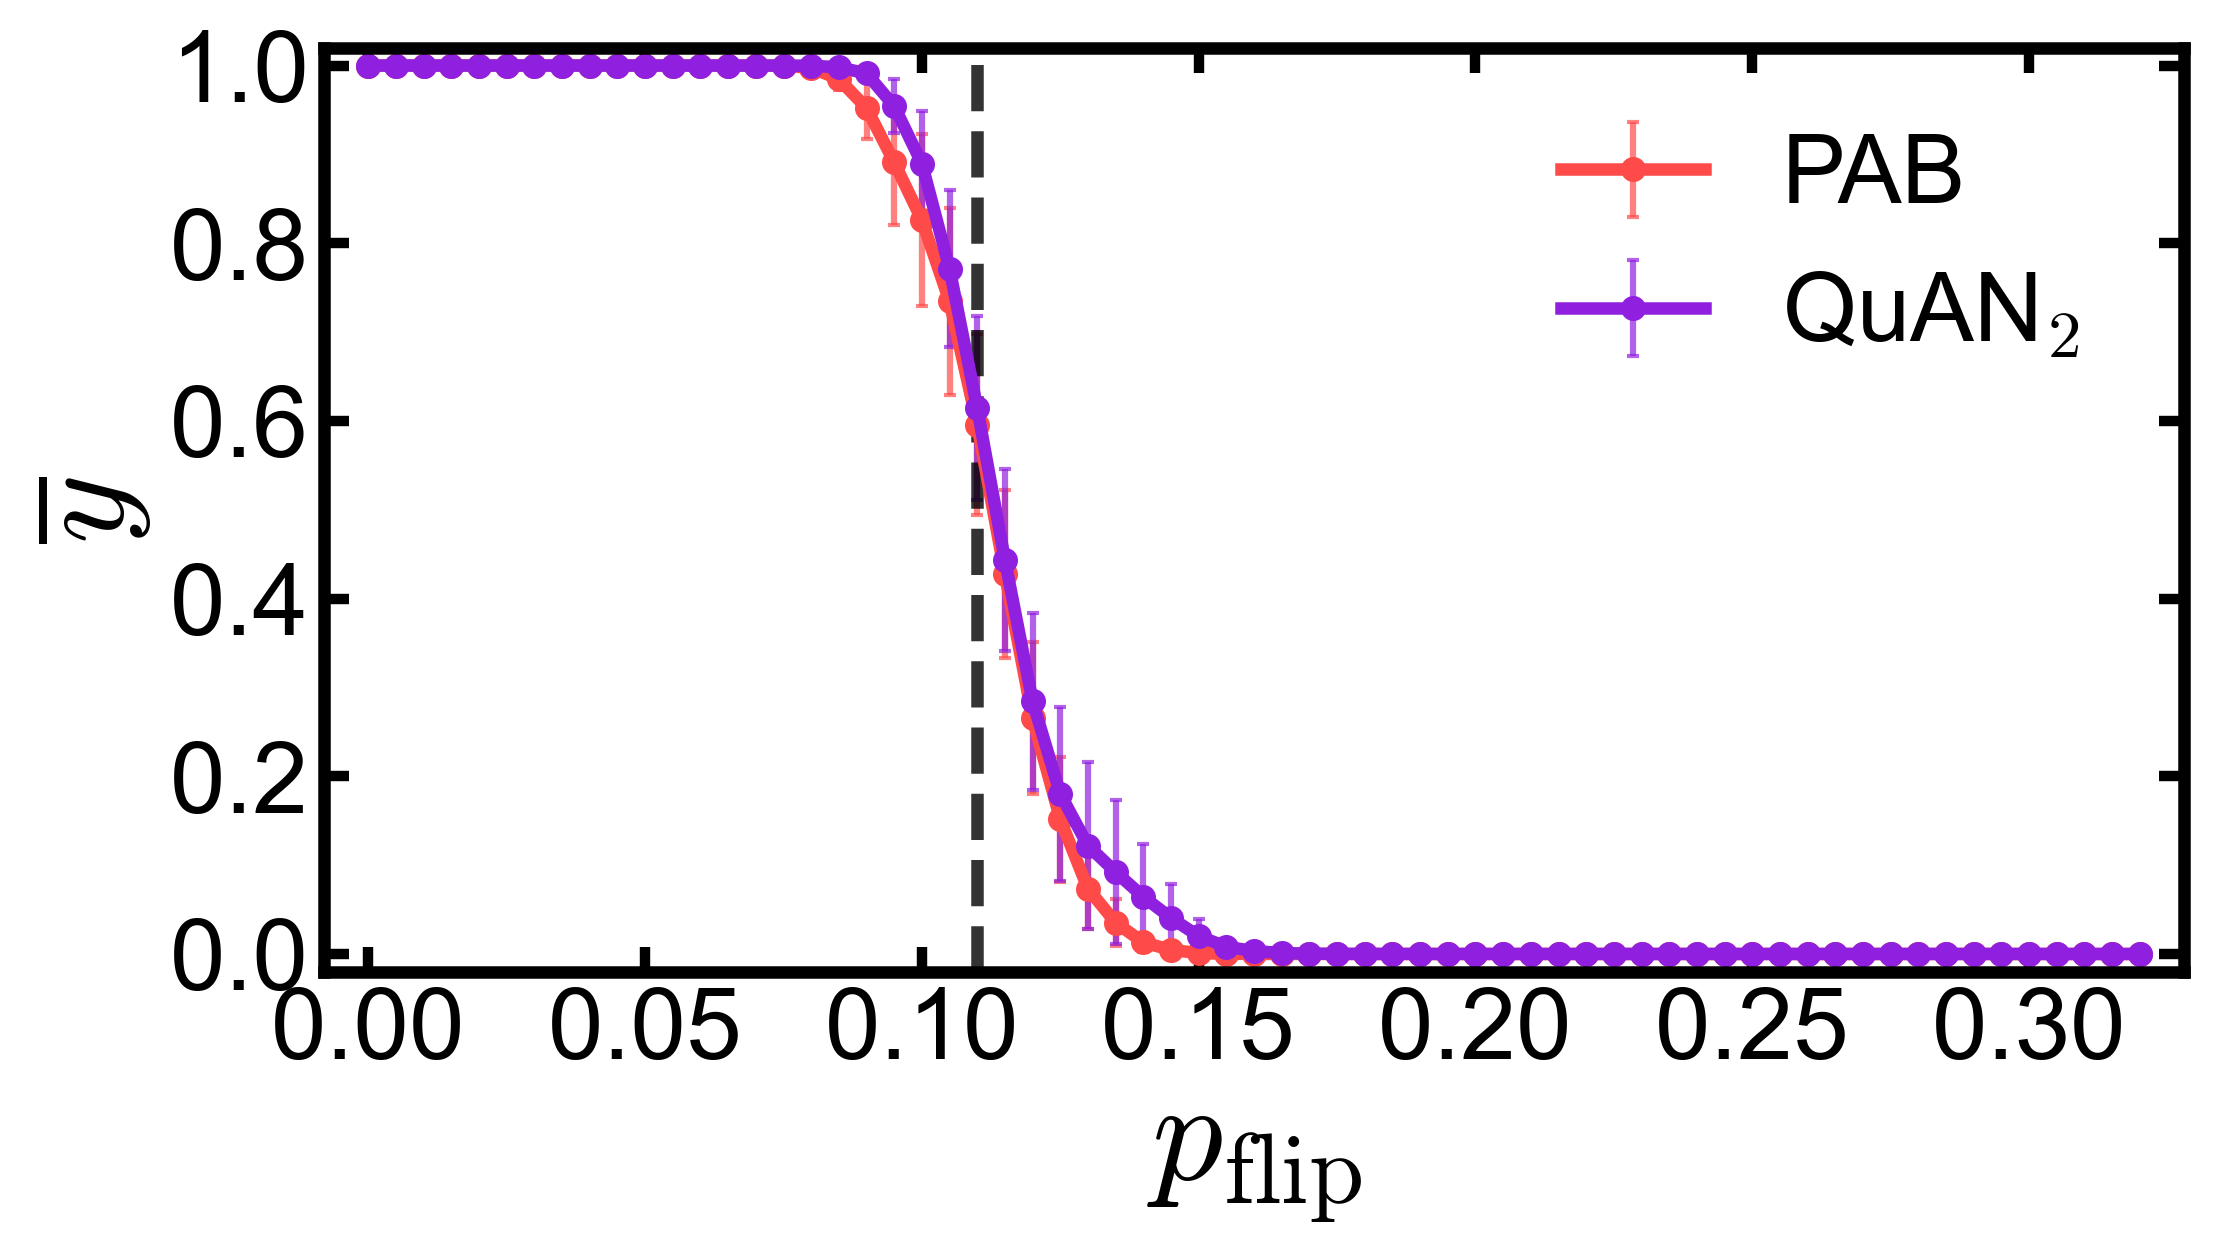

In [120]:
plt.figure(figsize=(8, 4), dpi=300)
nr = 6; nc = nr
for p2train in [0.3]:
#     plt.axvspan(-0.008, 0.02, fc='none', lw=2, ec='k', hatch='////', alpha=.4)
#     plt.axvspan(0.28, 0.308, fc='none', lw=2, ec='#eb4034', hatch='\\\\\\\\', alpha=.4)
    for i,mn in enumerate(['p00', 'p01', 'p11']):
        filename = f'g2_saved_models_nishad/TI_QSLloop{nr*nc}_{mn}_0.000vs{p2train:.3f}_5_phasediagram.npz'
        if mn=='p00':
            filename = f'g2_saved_models_nishad_new/TI_QSLloop{nr*nc}_{mn}_0.000vs{p2train:.3f}_5_phasediagram.npz'
        data = np.load(filename)
        phase_diagram_out = np.zeros((9,10,20,65))
        phase_diagram_out[:,:,:,:61] = data['arr0']
        decision_boundary = np.zeros((9,10)); decision_boundary[:] = np.nan


        errorbar = True
        color_r = sns.color_palette("Set2").as_hex()
        color_r = ['#9020DF', '#FE4A49', '#2AB7CA'][::-1]
        
        if i==0: continue
        for k, setsize in enumerate(2**np.arange(8)):
            if setsize!=64: continue 
            n = 0
            mask = (phase_diagram_out[k, :, n, 0]>0) 
            if mn!='p00':
                mask *= (phase_diagram_out[k, :, n, 40]<0.05)
            if not errorbar:
                plt.plot(0.005*np.arange(65), \
                     phase_diagram_out[k, :, n, :65][mask].mean(axis=0), '.-', \
                     c=color_r[i], label=f'set={setsize}')
            else:
                markers, caps, bars = plt.errorbar(0.005*np.arange(65), \
                     phase_diagram_out[k, :, n, :65][mask].mean(axis=0), \
                     yerr = phase_diagram_out[k, :, n, :65][mask].std(axis=0)/np.sqrt(mask.sum()),\
                     fmt='.-', capsize=1.5, ms=10, lw=3, elinewidth=1.5, c=color_r[i], label=f'{modeldict[mn]}')
                [bar.set_alpha(0.7) for bar in bars]; [cap.set_alpha(0.7) for cap in caps]
        plt.ylabel(r'$\overline{y}$', fontsize=32)
    plt.xlabel(r'$p_\mathrm{flip}$', fontsize=34)
    plt.xlim(-0.008,0.32+0.008)
    plt.ylim(-0.02,1.02)
    plt.legend(loc=1, handlelength =1.5, bbox_to_anchor=(0.99,1), fontsize=23)
    
    plt.axvline(0.11, c='k', lw=3, alpha=0.8, ls='--')
    plt.xticks([0.0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30], fontsize=24)
    plt.yticks(fontsize=24)
    plt.gca().xaxis.set_tick_params(width=2.5)
    plt.gca().yaxis.set_tick_params(width=2.5)
plt.savefig('fig4e.png')

/Users/hyejin/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/var/folders/km/qpx_vm0n53z_pvldds5qm8pw0000gn/T/ipykernel_59226/1585726132.py:31: RuntimeWarning: All-NaN slice encountered
  ax[1].fill_between(np.arange(ac_curve.shape[1]), np.nanmin(ac_curve, axis=0), np.nanmax(ac_curve, axis=0), \


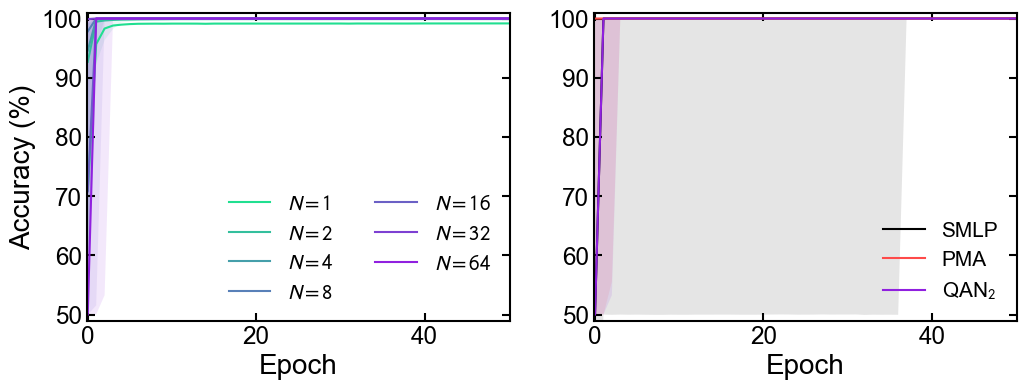

In [23]:
modeldict = {'p11':r'QAN$_2$', 'p01':'PMA', 'p00':'SMLP'}
p2train = .3

fig, ax = plt.subplots(1,2, figsize=(12, 4))
mn = 'p11'
color_r = ['#20DF90', '#33BF9D', '#459FAA', '#5880B8', '#6B60C5', '#7D40D2', '#9020DF']
for k,setsize in enumerate(2**np.arange(7)):
    ac_curve = np.zeros((10, 500)); ac_curve[:] = np.nan
    for run in [0,1,2,3,4,5,6,7,8,9]:
        filename = f'g2_saved_models_nishad/QSL_{mn}_0.000vs{p2train:.3f}_5_run_{run}/' +\
                    f'log_6x6_0.000vs{p2train:.3f}-{mn}_set{setsize}_h16nh4_ch1ker1st1.txt'
        if not is_non_zero_file(filename): continue
        _,_,ac_tr,ac_ts,_,_ = np.loadtxt(filename, unpack=True)
        ac_curve[run, :len(_)] = ac_ts
    ax[0].plot(np.nanmedian(ac_curve, axis=0), c=color_r[k], label=fr'$N={setsize}$')
    ax[0].fill_between(np.arange(ac_curve.shape[1]), ac_curve.min(axis=0), ac_curve.max(axis=0), \
                     color=color_r[k], alpha=.1, ec='none')


color_r = ['#9020DF', '#FE4A49', 'k'][::-1]
for k, mn in enumerate(['p00', 'p01', 'p11']):
    ac_curve = np.zeros((10, 500)); ac_curve[:] = np.nan
    for run in [0,1,2,3,4,5,6,7,8,9]:
        filename = f'g2_saved_models_nishad/QSL_{mn}_0.000vs{p2train:.3f}_5_run_{run}/' +\
                    f'log_6x6_0.000vs{p2train:.3f}-{mn}_set{setsize}_h16nh4_ch1ker1st1.txt'
        if not is_non_zero_file(filename): continue
        _,_,ac_tr,ac_ts,_,_ = np.loadtxt(filename, unpack=True)
        
        ac_curve[run, :len(_)] = ac_ts
    ax[1].plot(np.nanmedian(ac_curve, axis=0), c=color_r[k], label=f'{modeldict[mn]}')
    ax[1].fill_between(np.arange(ac_curve.shape[1]), np.nanmin(ac_curve, axis=0), np.nanmax(ac_curve, axis=0), \
                     color=color_r[k], alpha=.1, ec='none')

    for a in ax:
        a.set_xlim(-0.1, 50.1)
        a.set_ylim(49, 101)
        a.set_xlabel('Epoch', fontsize=20)

ax[0].set_ylabel('Accuracy (%)', fontsize=20)
ax[0].legend(loc=4, ncol=2,fontsize=15)
ax[1].legend(loc=4, fontsize=15)
plt.show()

Due to large volume of `Data_out/g2_saed_models_tc/TCloop36_p11_0.000vs0.300_5_confidence.npz` and `Data_out/g2_saed_models_tc/TCloop36_p01_0.000vs0.300_5_confidence.npz`, we will provide these upon request. One can also generate these files by running `~/QuAN/TC/test_confidence_tc.py`.

In [390]:
from scipy import stats
conf_avg = np.zeros((2,7,61,10,200))
conf_avg[:] = np.nan
n_sets = np.zeros((7,200))

for i, mn in enumerate(['p01', 'p11']):
    outputs = np.load(f'Data_out/g2_saed_models_tc/'\
                        +f'TCloop36_{mn}_0.000vs{0.3:.3f}_5_confidence.npz')['arr0']
    for j, setsize in enumerate(2**np.arange(7)):
        for k,pflip in enumerate(0.005*np.arange(61)):
            output = outputs[j,:,k].reshape(-1); output = output[~np.isnan(output)]    
            if output.shape[0]==0: continue
            for m in range(10):
                for l,fraction in enumerate(np.geomspace(1,len(output),200)):
                    np.random.shuffle(output)
                    outpu = output[:int(len(output)//fraction)]
                    conf_avg[i,j,k,m,l] = stats.ttest_1samp(outpu, popmean=0.5, alternative='greater')[1]
                    n_sets[j,l] = len(outpu)


/var/folders/km/qpx_vm0n53z_pvldds5qm8pw0000gn/T/ipykernel_72042/3970554967.py:17: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  conf_avg[i,j,k,m,l] = stats.ttest_1samp(outpu, popmean=0.5, alternative='greater')[1]


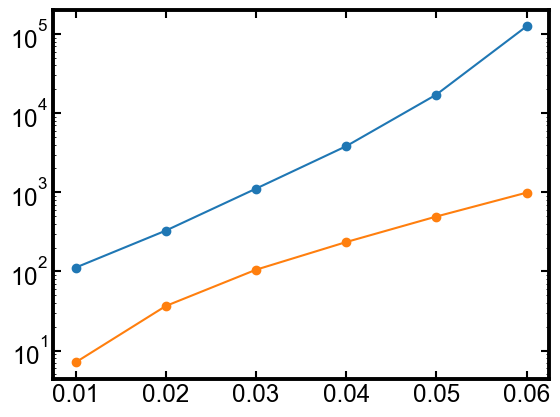

In [73]:
d0 = [1.11845563e2, 3.28144896e2, 1.11228949e3, 3.82261984e3, 1.71504787e4, 1.24848831e5]
d2 = [7.1091131,36.62495558,105.13176266,235.10519038,494.19293432,989.2520159]

plt.plot([0.01, 0.02, 0.03, 0.04, 0.05, 0.06], d0, 'o-')
plt.plot([0.01, 0.02, 0.03, 0.04, 0.05, 0.06], d2, 'o-')
plt.yscale('log')

In [516]:
Mstar = np.zeros((2,7,61,10, 200)); Mstar[:] = np.nan
threshold = 1-0.95 # 95% confidence

for i, mn in enumerate(['p01', 'p11']): 
    for j, setsize in enumerate(2**np.arange(7)):
        for k, pflip in enumerate(0.005*np.arange(61)):
            for m in range(10):
                x,y = intersection(n_sets[j], conf_avg[i,j,k,m], n_sets[j], np.ones(Mstar.shape[-1])*threshold)
                if x.shape[0]==0:
                    if conf_avg[i,j,k,m,0]<0.05: Mstar[i,j,k,m,0] = 1
                    else: continue
                else: 
                    if conf_avg[i,j,k,m,0]<0.05: Mstar[i,j,k,m,:y.shape[0]] = x
                    else: continue

/var/folders/km/qpx_vm0n53z_pvldds5qm8pw0000gn/T/ipykernel_72042/1645931089.py:10: RuntimeWarning: Mean of empty slice
  func = np.mean(np.nanmean(Mstar[i,j,:,:,:20],axis=2),axis=1)[5:]*64*nuc
/var/folders/km/qpx_vm0n53z_pvldds5qm8pw0000gn/T/ipykernel_72042/1645931089.py:12: RuntimeWarning: Mean of empty slice
  yerr = np.std(np.nanmean(Mstar[i,j,:,:,:20],axis=2),axis=1)[5:]*64*nuc/3,\


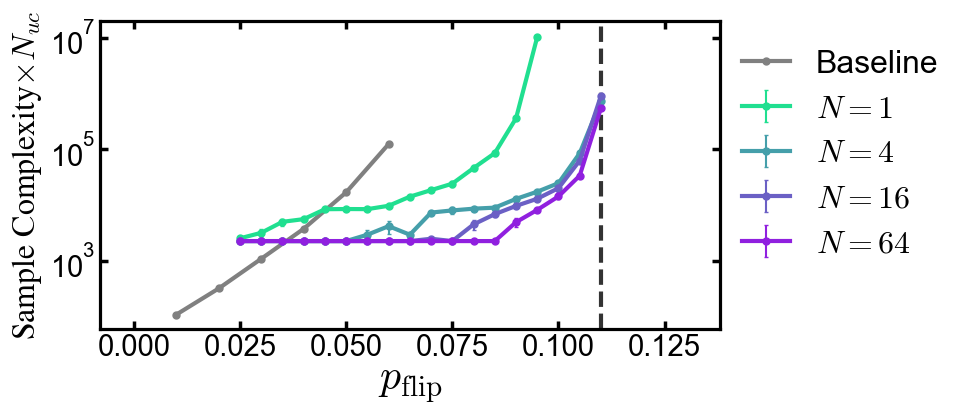

In [647]:
# plt.figure(figsize=(8, 4), dpi=300)
nuc = 36
mpl.rcParams['axes.linewidth'] = 2.3
fig, ax = plt.subplots(1, 1, figsize=(8, 4), sharex='col', sharey='row')
for i, mn in enumerate(['p01', 'p11']):  
    if i==0: continue
    ax.axvline(0.11,c='k', alpha=.8,lw=3, ls='--')
    for j, setsize in enumerate(2**np.arange(7)):
        if j%2!=0: continue
        func = np.mean(np.nanmean(Mstar[i,j,:,:,:20],axis=2),axis=1)[5:]*64*nuc
        ax.errorbar(0.005*np.arange(61)[5:], func, \
                   yerr = np.std(np.nanmean(Mstar[i,j,:,:,:20],axis=2),axis=1)[5:]*64*nuc/3,\
                   fmt='.-', c=color_r[j], ms=10, capsize=1.5, lw=3, elinewidth=1.5, \
                   label=fr'$N={setsize}$')
    ax.set_xlim(-.008, 0.138)
    ax.set_yscale('log')
    ax.set_xlabel(r'$p_\mathrm{flip}$', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=21)

plt.plot([0.01, 0.02, 0.03, 0.04, 0.05, 0.06], d0, '.-', c='grey', ms=10, lw=3, label='Baseline')
ax.xaxis.set_tick_params(width=2.5)
ax.yaxis.set_tick_params(width=2.5)
ax.legend(loc=2, handlelength =1.5, bbox_to_anchor=(0.99,1), fontsize=23)

ax.set_ylabel(r'Sample Complexity$\times N_{uc}$', fontsize=23, font='STIXGeneral')

plt.gca().tick_params(axis='both', which='major', labelsize=21)
plt.gca().xaxis.set_tick_params(width=2.5)
plt.gca().yaxis.set_tick_params(width=2.5)
circ0 = mpatches.Ellipse((0.809, 0),0.3*0.1,0.3*0.2, ec='k', fc='#fce130', lw=2.5, \
                                transform=plt.gca().transAxes, clip_on = False, zorder=10)
plt.savefig('fig_sup_E_sc.png', dpi=300)

/var/folders/km/qpx_vm0n53z_pvldds5qm8pw0000gn/T/ipykernel_72042/1616796336.py:9: RuntimeWarning: Mean of empty slice
  func = np.mean(np.nanmean(Mstar[i,j,:,:,:10],axis=2),axis=1)*64*nuc
/var/folders/km/qpx_vm0n53z_pvldds5qm8pw0000gn/T/ipykernel_72042/1616796336.py:12: RuntimeWarning: Mean of empty slice
  yerr = np.std(np.nanmean(Mstar[i,j,:,:,:25],axis=2),axis=1)[5:]*64*nuc/3,\
/var/folders/km/qpx_vm0n53z_pvldds5qm8pw0000gn/T/ipykernel_72042/1616796336.py:17: RuntimeWarning: Mean of empty slice
  func = np.mean(np.nanmean(Mstar[i,j,:,:,:10],axis=2),axis=1)*64*nuc
/var/folders/km/qpx_vm0n53z_pvldds5qm8pw0000gn/T/ipykernel_72042/1616796336.py:20: RuntimeWarning: Mean of empty slice
  yerr = np.std(np.nanmean(Mstar[i,j,:,:,:25],axis=2),axis=1)[5:]*64*nuc/3,\


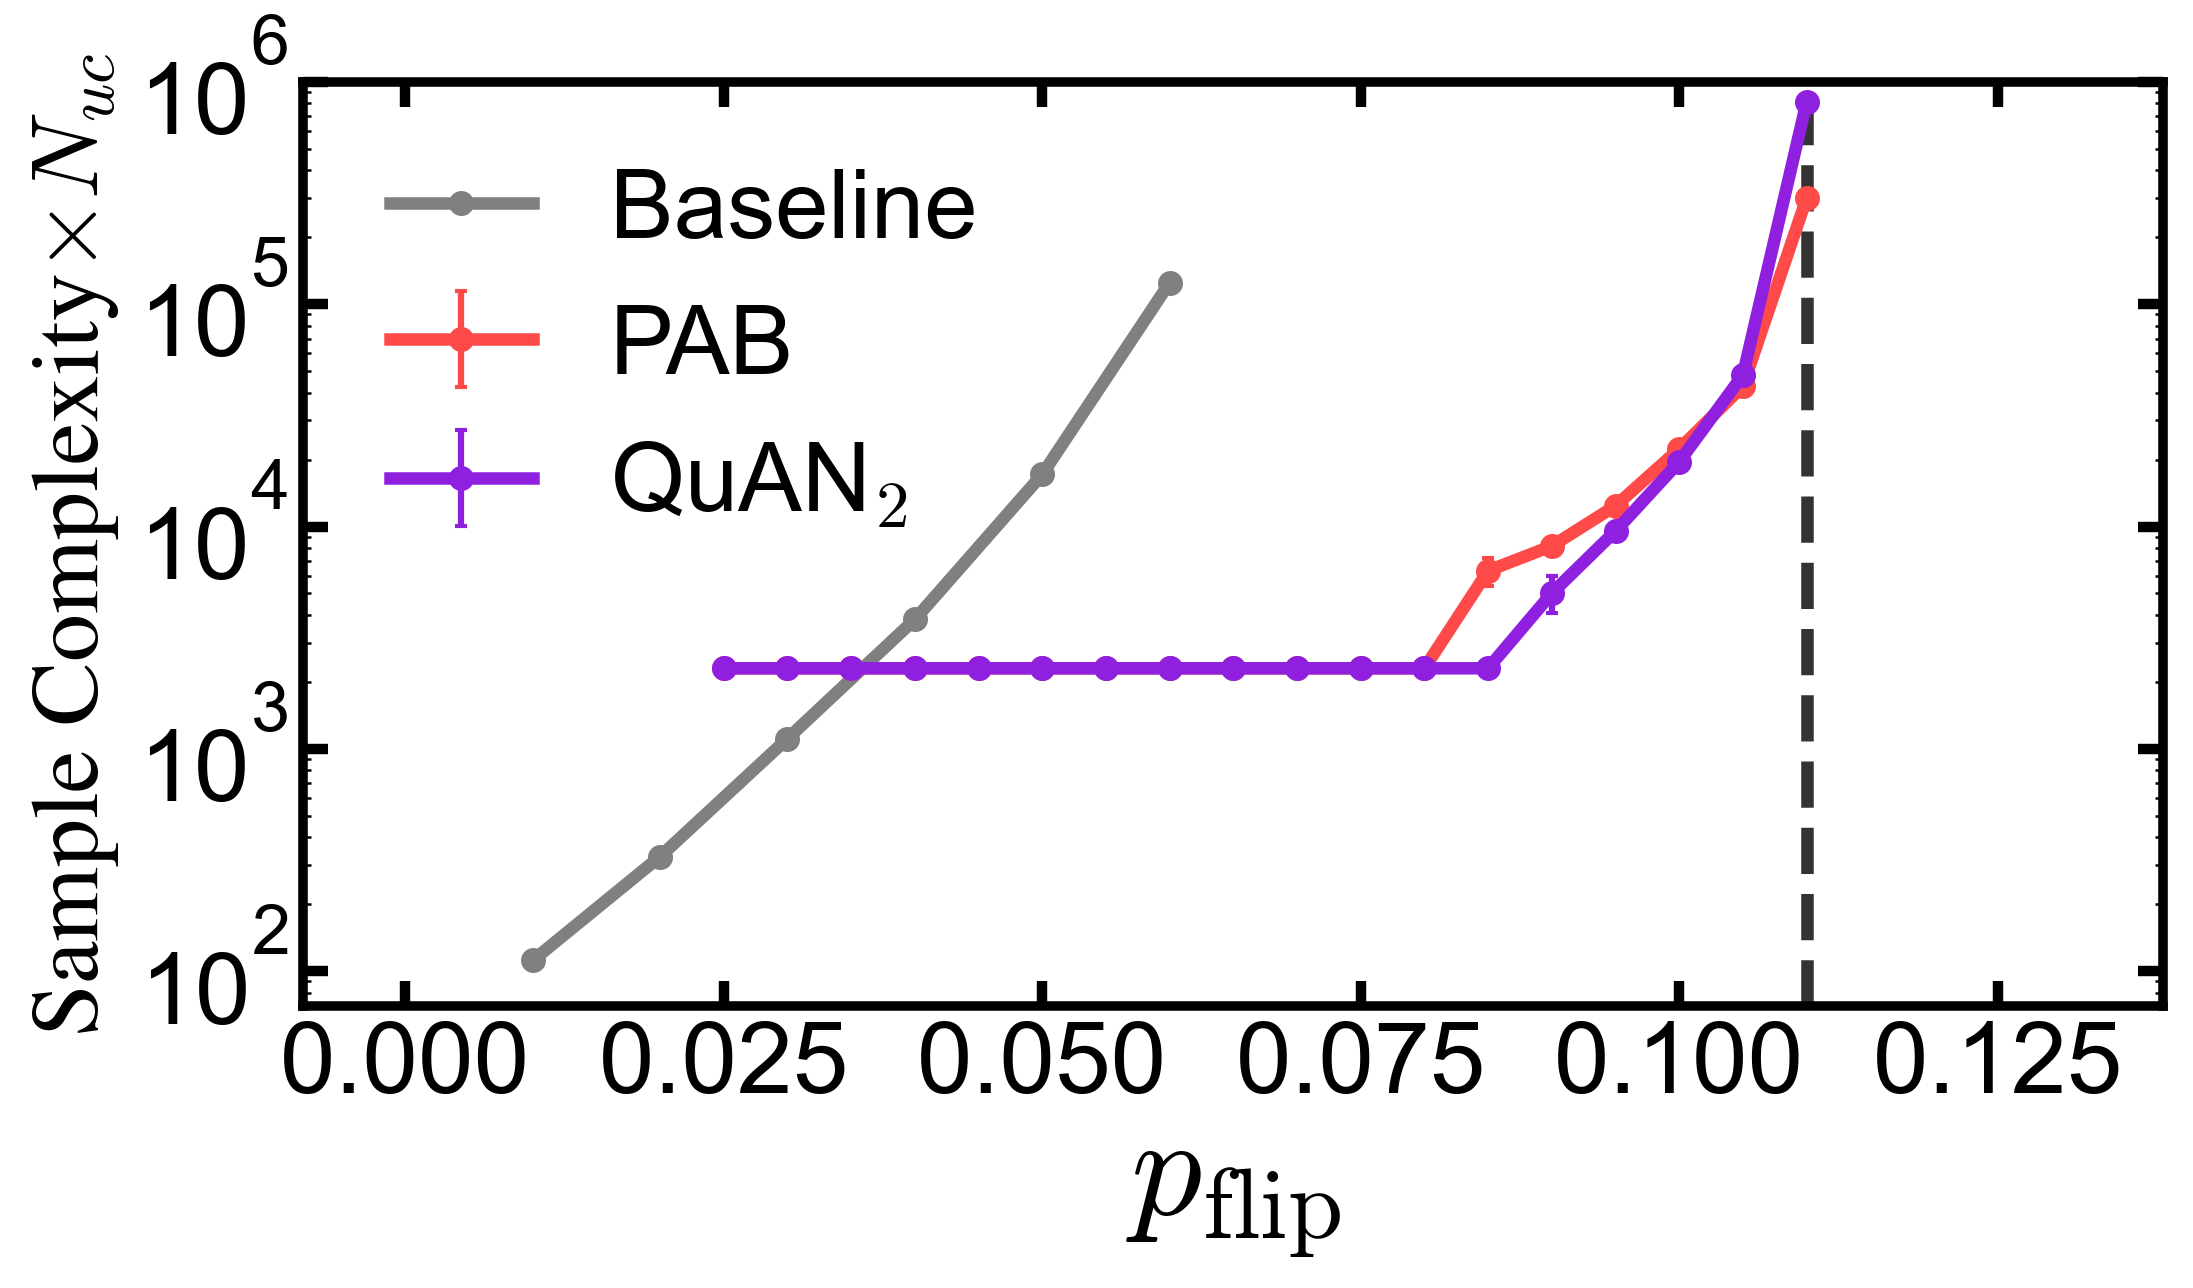

In [646]:

plt.figure(figsize=(8, 4), dpi=300)
mpl.rcParams['axes.linewidth'] = 2.3

plt.axvline(0.11, c='k', lw=3, alpha=0.8, ls='--')


i,j = 0,6
func = np.mean(np.nanmean(Mstar[i,j,:,:,:10],axis=2),axis=1)*64*nuc
plt.errorbar(0.005*np.arange(61)[5:], func[5:], \
           yerr = np.std(np.nanmean(Mstar[i,j,:,:,:25],axis=2),axis=1)[5:]*64*nuc/3,\
               fmt='.-', c='#FE4A49', ms=10, capsize=1.5, lw=3, elinewidth=1.5, \
               label=fr'PAB')
        
i,j = 1,6
func = np.mean(np.nanmean(Mstar[i,j,:,:,:10],axis=2),axis=1)*64*nuc
plt.errorbar(0.005*np.arange(61)[5:], func[5:], \
           yerr = np.std(np.nanmean(Mstar[i,j,:,:,:25],axis=2),axis=1)[5:]*64*nuc/3,\
               fmt='.-', c=color_r[j], ms=10, capsize=1.5, lw=3, elinewidth=1.5, \
               label=fr'QuAN$_2$')

plt.plot([0.01, 0.02, 0.03, 0.04, 0.05, 0.06], d0, '.-', c='grey', ms=10, lw=3, label='Baseline')
plt.ylim(70, 1e6)
plt.xlim(-.008, 0.138)
plt.yscale('log')
plt.ylabel(r'Sample Complexity$\times N_{uc}$', fontsize=23, font='STIXGeneral')
plt.xlabel(r'$p_\mathrm{flip}$', fontsize=34)
plt.xticks([0.0, 0.025, 0.05, 0.075, 0.10, 0.125], fontsize=24)
plt.yticks(fontsize=24)
plt.gca().xaxis.set_tick_params(width=2.5)
plt.gca().yaxis.set_tick_params(width=2.5)
plt.legend(handlelength =1.5, fontsize=23)

circ0 = mpatches.Ellipse((0.809, 0),0.3*0.1,0.3*0.2, ec='k', fc='#fce130', lw=2.5, \
                                transform=plt.gca().transAxes, clip_on = False, zorder=10)
plt.savefig(f'fig4_sc.png', dpi = 300)